In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import skimage.io
import skimage.transform

import tensorflow as tf
import keras

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(24)

Using TensorFlow backend.


In [2]:
training_set_dir = r"/Users/lukeelliott/Thinkful/Bootcamp/Unit 6/TensorFlow/dataset_updated/training_set"
validation_set_dir = r"/Users/lukeelliott/Thinkful/Bootcamp/Unit 6/TensorFlow/dataset_updated/validation_set"

cats = ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']

labels = {'drawings':0, 'engraving':1, 'iconography':2, 'painting':3, 'sculpture':4}

In [3]:
img_dict = {}

for cat in cats:
    cat_names = os.listdir(os.path.join(training_set_dir, cat))
    img_dict[cat] = cat_names

In [4]:
img_and_cat = []

img_dimensions = (128, 128, 3)

for cat in cats:
    for img in img_dict[cat][0:1000]:
        try:
            nd_img = skimage.io.imread(os.path.join(training_set_dir, cat, img))
            nd_img = skimage.transform.resize(nd_img, img_dimensions)
            img_and_cat.append((nd_img, cat))
        except OSError:
            pass

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [5]:
import random

img_and_cat = random.sample(img_and_cat, len(img_and_cat))

In [6]:
train_data = [x[0] for x in img_and_cat]
train_labels = [x[1] for x in img_and_cat]

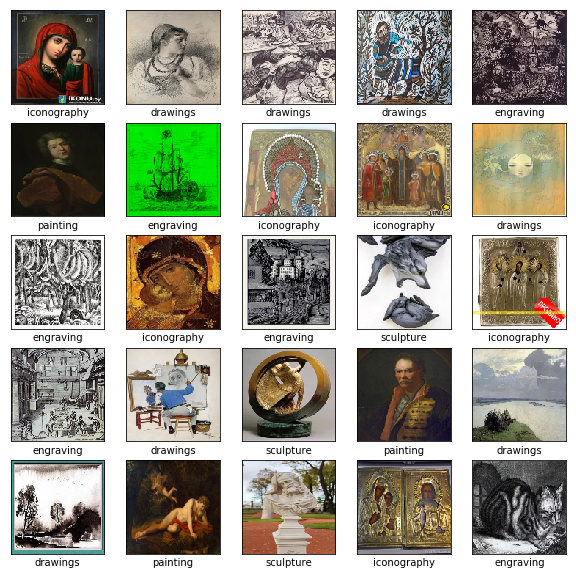

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [8]:
train_labels = [labels[x] for x in train_labels]
train_labels = np.array(train_labels)

train_data = np.array(train_data)

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(train_data)

In [10]:
data_flow = datagen.flow(train_data, train_labels, batch_size=32)

### Model 1

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])


In [12]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.fit_generator(data_flow, steps_per_epoch=len(train_data)/32, epochs=5)

Epoch 1/5
148/147 [==============================] - 56s 382ms/step - loss: 10.9633 - acc: 0.3127
Epoch 2/5
148/147 [==============================] - 42s 281ms/step - loss: 10.7231 - acc: 0.3326
Epoch 3/5
148/147 [==============================] - 40s 272ms/step - loss: 13.0184 - acc: 0.1917
Epoch 4/5
148/147 [==============================] - 36s 241ms/step - loss: 12.7376 - acc: 0.2097
Epoch 5/5
148/147 [==============================] - 44s 299ms/step - loss: 12.6432 - acc: 0.2152


### Model 2

In [14]:
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(128, 128, 3)))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dropout(0.1))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dropout(0.1))
model2.add(keras.layers.Dense(5, activation='softmax'))
model.summary()

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6291584   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 6,292,229
Trainable params: 6,292,229
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.fit_generator(data_flow, steps_per_epoch=len(train_data)/32, epochs=5)

Epoch 1/5
148/147 [==============================] - 39s 261ms/step - loss: 11.4083 - acc: 0.2802
Epoch 2/5
148/147 [==============================] - 35s 238ms/step - loss: 10.9545 - acc: 0.3152
Epoch 3/5
148/147 [==============================] - 35s 233ms/step - loss: 10.8042 - acc: 0.3262
Epoch 4/5
148/147 [==============================] - 34s 231ms/step - loss: 10.7214 - acc: 0.3330
Epoch 5/5
148/147 [==============================] - 38s 254ms/step - loss: 11.5501 - acc: 0.2819


### Model 3

In [16]:
model3 = keras.Sequential()
model3.add(keras.layers.Conv2D(32, kernel_size=5, input_shape=(128, 128, 3), activation='relu'))

model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model3.add(keras.layers.Dropout(0.25))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(keras.layers.Dropout(0.5))
model3.add(keras.layers.Dense(5, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [17]:
model3.fit_generator(data_flow, steps_per_epoch=len(train_data)/32, epochs=5)

Epoch 1/5
148/147 [==============================] - 186s 1s/step - loss: 3.1080 - acc: 0.4633
Epoch 2/5
148/147 [==============================] - 196s 1s/step - loss: 1.3049 - acc: 0.5458
Epoch 3/5
148/147 [==============================] - 170s 1s/step - loss: 1.2136 - acc: 0.5701
Epoch 4/5
148/147 [==============================] - 185s 1s/step - loss: 1.2475 - acc: 0.5849
Epoch 5/5
148/147 [==============================] - 166s 1s/step - loss: 1.1662 - acc: 0.6054


### Model 4

In [18]:
model4 = keras.Sequential()
model4.add(keras.layers.Conv2D(32, kernel_size=5, input_shape=(128, 128, 3), activation='relu'))

model4.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model4.add(keras.layers.Dropout(0.25))

model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(128, activation='relu'))
model4.add(keras.layers.Dropout(0.5))
model4.add(keras.layers.Dense(5, activation='softmax'))

model4.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(),
              metrics=['accuracy'])

In [19]:
model4.fit_generator(data_flow, steps_per_epoch=len(train_data)/32, epochs=5)

Epoch 1/5
148/147 [==============================] - 215s 1s/step - loss: 4.0839 - acc: 0.4221
Epoch 2/5
148/147 [==============================] - 299s 2s/step - loss: 1.2348 - acc: 0.5388
Epoch 3/5
148/147 [==============================] - 183s 1s/step - loss: 1.1356 - acc: 0.5707
Epoch 4/5
148/147 [==============================] - 130s 882ms/step - loss: 1.1460 - acc: 0.5530
Epoch 5/5
148/147 [==============================] - 125s 847ms/step - loss: 1.0873 - acc: 0.5792


### Model 5

In [20]:
model5 = keras.Sequential()

model5.add(keras.layers.Conv2D(32, kernel_size=5, input_shape=(128, 128, 3), activation='relu'))
model5.add(keras.layers.MaxPool2D(2, 2))
model5.add(keras.layers.Dropout(0.25))
model5.add(keras.layers.Conv2D(32, kernel_size=5, activation='relu'))
model5.add(keras.layers.MaxPool2D(2, 2))
model5.add(keras.layers.Dropout(0.25))

model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(128, activation='relu'))
model5.add(keras.layers.Dense(5, activation='softmax'))

model5.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(),
              metrics=['accuracy'])

In [21]:
model5.fit_generator(data_flow, steps_per_epoch=len(train_data)/32, epochs=5)

Epoch 1/5
148/147 [==============================] - 619s 4s/step - loss: 1.5578 - acc: 0.4430
Epoch 2/5
148/147 [==============================] - 239s 2s/step - loss: 1.1298 - acc: 0.5420
Epoch 3/5
148/147 [==============================] - 259s 2s/step - loss: 1.0410 - acc: 0.5796
Epoch 4/5
148/147 [==============================] - 265s 2s/step - loss: 0.9768 - acc: 0.5847
Epoch 5/5
148/147 [==============================] - 278s 2s/step - loss: 0.9813 - acc: 0.5914


In [22]:
model6 = keras.Sequential()
model6.add(keras.layers.Conv2D(32, kernel_size=5, input_shape=(128, 128, 3), activation='relu'))

model6.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model6.add(keras.layers.Conv2D(48, kernel_size=3, activation='relu'))
model6.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.35))

model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(256, activation='relu'))
model6.add(keras.layers.Dropout(0.25))
model6.add(keras.layers.Dense(5, activation='softmax'))

# Don't forget to compile the model6
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model6.fit_generator(data_flow, steps_per_epoch=len(train_data)/32, epochs=5)

Epoch 1/5
148/147 [==============================] - 217s 1s/step - loss: 1.4362 - acc: 0.5834
Epoch 2/5
148/147 [==============================] - 201s 1s/step - loss: 1.0060 - acc: 0.6655
Epoch 3/5
148/147 [==============================] - 413s 3s/step - loss: 0.9024 - acc: 0.6869
Epoch 4/5
148/147 [==============================] - 243s 2s/step - loss: 0.9099 - acc: 0.6974
Epoch 5/5
148/147 [==============================] - 212s 1s/step - loss: 0.8582 - acc: 0.7183


In [24]:
v_img_dict = {}

for cat in cats:
    cat_names = os.listdir(os.path.join(validation_set_dir, cat))
    v_img_dict[cat] = cat_names

In [25]:
v_img_and_cat = []

for cat in cats:
    for img in v_img_dict[cat][0:200]:
        try:
            nd_img = skimage.io.imread(os.path.join(validation_set_dir, cat, img))
            nd_img = skimage.transform.resize(nd_img, img_dimensions)
            v_img_and_cat.append((nd_img, cat))
        except OSError:
            pass

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [26]:
v_img_and_cat = random.sample(v_img_and_cat, len(v_img_and_cat))


validation_data = [x[0] for x in v_img_and_cat]
validation_labels = [x[1] for x in v_img_and_cat]

validation_labels = [labels[x] for x in validation_labels]

validation_labels = np.array(validation_labels)
validation_data = np.array(validation_data)

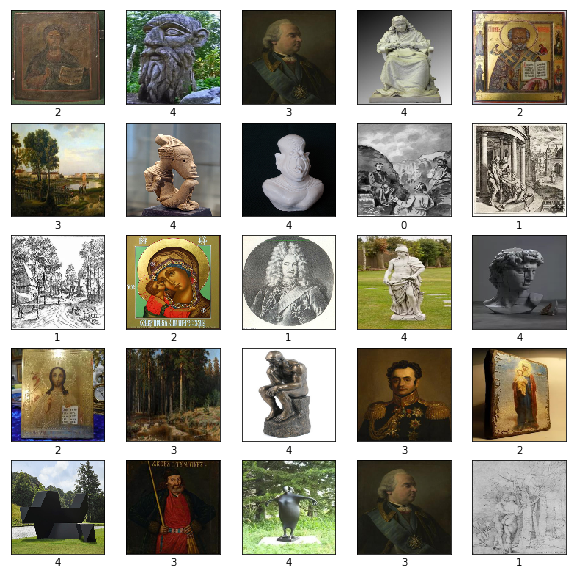

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validation_data[i], cmap=plt.cm.binary)
    plt.xlabel(validation_labels[i])

In [28]:
model6.evaluate(validation_data, validation_labels, verbose=0)

[1.1286252712901634, 0.6531645571129232]

This is all using a very small portion of the data because my computer is weak. It takes forever to run.